In [125]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [126]:
X,y = make_blobs(n_samples=1000,n_features=2,centers=5,random_state=10,cluster_std=2)

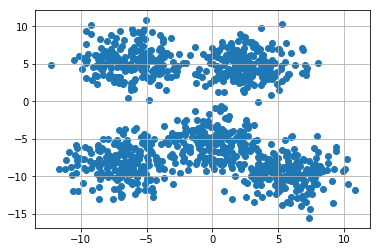

In [127]:
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [128]:
## step 1 is to initialise random centers for the k clusters
 
color = ["red","green","blue","orange","yellow"]

## k clusters
k = 5

## clusters is a dictionary that will store dictionaries of all clusters storing information like center,color,points 
clusters = {}

for i in range(k):
    
    ## initialise with a random center between -10 and 10 in both axis
    center = 10*np.random.random((2,))
    
    points = []
    cluster = {
        'center':center,
        'points':points,
        'color':color[i]
    }
    
    clusters[i] = cluster
    
    

In [129]:
print(clusters)

{0: {'center': array([2.05375702, 0.68478705]), 'points': [], 'color': 'red'}, 1: {'center': array([9.35816491, 5.88455704]), 'points': [], 'color': 'green'}, 2: {'center': array([4.77579188, 5.50431665]), 'points': [], 'color': 'blue'}, 3: {'center': array([4.13971702, 0.57246563]), 'points': [], 'color': 'orange'}, 4: {'center': array([6.89327131, 0.9912911 ]), 'points': [], 'color': 'yellow'}}


In [130]:
def Distance(v1,v2):
    return np.sum((v1-v2)**2)

In [131]:
## step 2 is to divide all the samples into k clusters

In [132]:
## assigning the points a cluster is known as the E step

def Estep(clusters):    
    for i in range(X.shape[0]):
        point = X[i]
        distance = []
        for kx in range(k):
            dist = Distance(point,clusters[kx]['center'])
            distance.append(dist)
        clusters[np.argmin(distance)]['points'].append(point)    
            

In [133]:
## updating the cluster centers is known as the M step

def Mstep(clusters):
    
    for kx in clusters:
        
        points = np.array(clusters[kx]['points'])
        try:
            new_mean = np.mean(points,axis=0)
            clusters[kx]['center'] = new_mean
            clusters[kx]['points'] = []
        except:
            pass
        

In [146]:
## plotting

def plot(clusters):
    
    for kx in range(k):
        
        points = np.array(clusters[kx]['points'])
        center = clusters[kx]['center']
        
        try:
            plt.scatter(points[:,0],points[:,1],color=clusters[kx]['color'])
        except:
            pass
        
        plt.scatter(center[0],center[1],color="black",marker="*",s=300)

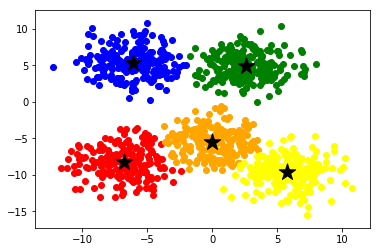

In [172]:
for i in range(100)
Estep(clusters)
plot(clusters)
Mstep(clusters)